# Supervised Learning

Remember Supervised Learning  is used when we want to predict a certain outcome from a goven input and we have examples of input/output pairs.

## Classification and Regression.
This are the two major types of supervised machine learning problems.

In _Classification_ the goal is to predict a class label which is a choice from apredefined list of possibilities. It can be binary (between 2) or multiple classes.

In _Regression_ the goal is to predict a continouse number or a float point number

## Generalization, Overfitting and Underfitting
Goal is to build models that generalize as accurate as possible. If a model is able to make accurate predictions on unseen data we say it is able to generalize from the training set to the test set.

_Overfitting_ this is whenyou fir a model too closely to the particularities of the training set and obtain a model that works well in the training set but is not avle to generalize to new data.
when you don't capture all the aspects  of data and variability , your model will perform badly  even on the training set this is _Underfitting_

## Supervised Learning algorithms 
### some sample Datasets


In [2]:

import mglearn
from matplotlib import  pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
%matplotlib notebook

/home/muoki/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/home/muoki/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# generate dataset
X , y = mglearn.datasets.make_forge()

X.shape (26, 2)


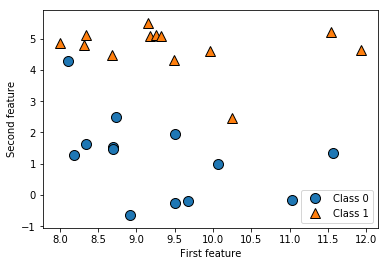

In [4]:
# plot datasets
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape", X.shape)

This dataset consists of 26 samples with 2 features
To illustrate regression we'll use synthetic wave dataset. 

Text(0,0.5,'Target')

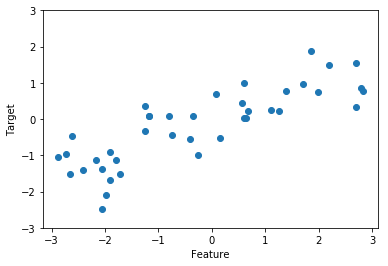

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

For real world dataset we will be using Wisconsin Breast Cancer dataset. The task is to learn to predict whether a tumor is malignant based og the measurements.

In [6]:
from sklearn.datasets import load_breast_cancer

In [7]:
cancer = load_breast_cancer()

In [8]:
print("Cancer.keys():\n", cancer.keys())

Cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [9]:
print("Shape of cancer data: ", cancer.data.shape)

Shape of cancer data:  (569, 30)


569 data points and 30 features

In [10]:
print("sample counts per class;\n",
     {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))})

sample counts per class;
 {'malignant': 212, 'benign': 357}


In [11]:
print("Feature names;\n", cancer.feature_names)

Feature names;
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


The datasets in the sklearn library can all be loaded in the same way.

### k-Nearest Neighbor
BUilding the model consists only of storing the training dataset To make a prediction for a new data point the algorithm finds the closest data points in the training dataset

#### k-neighbors classification

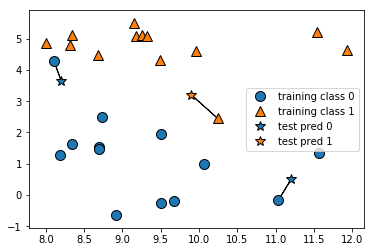

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

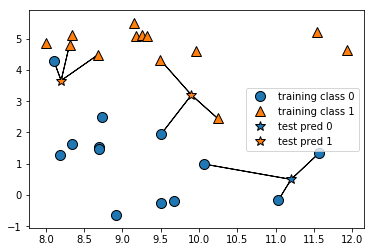

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

*Example*


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X, y = mglearn.datasets.make_forge()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [17]:
clf = KNeighborsClassifier(n_neighbors=3) #initialize

In [18]:
clf.fit(X_train, y_train) # train

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [19]:
print("Test set prediction", clf.predict(X_test)) # predict

Test set prediction [1 0 1 0 1 0 0]


In [20]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


model is about 86% accurate meaning the model predicted the class 86% of the damples in the test dataset.

#### Analyzing KNeughborsClassifier

Decision boundary divides between where the algorithm assigns class 0 verse where it assigns class 1


TypeError: 'AxesSubplot' object does not support indexing

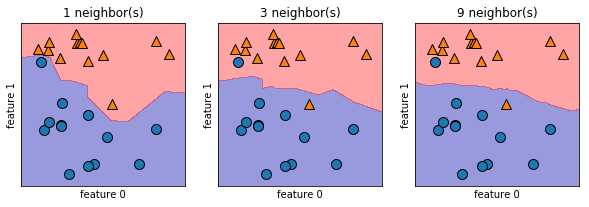

In [21]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors , ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
ax[0].legend(loc=3)

A smoother boundary  corresponds to a simpler model. Using few neighbors corresponds to high model complexity and using many neighbors corresponds to low model comlexity.
###### using breats cancer


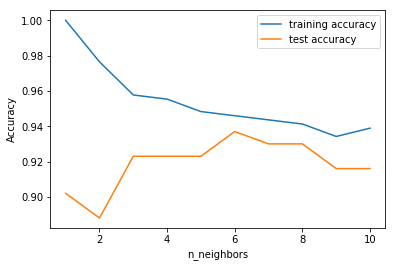

In [23]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

#### k-neighbors regression

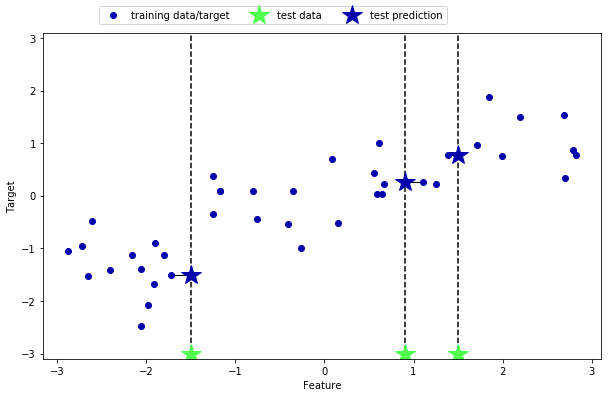

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

When using multiple nearest neighbors, the prediction is the average, or mean, of the relevant neighbors

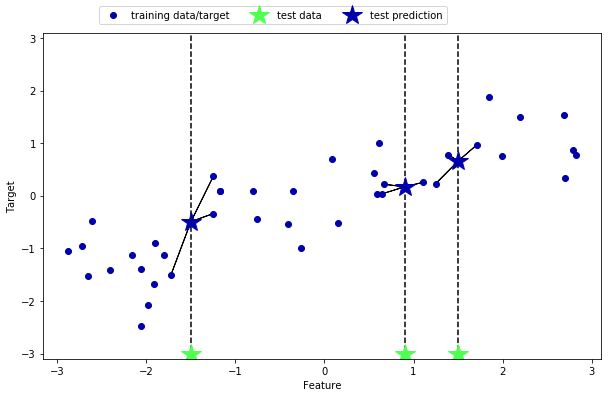

In [25]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The score method for regressors returns the `R^2` score. this is know as the coefficient of determination, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses, y_train. wheb negative it indicates anticorrelated predictions.

In [28]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


####  Analyzing KNeighborsRegressor

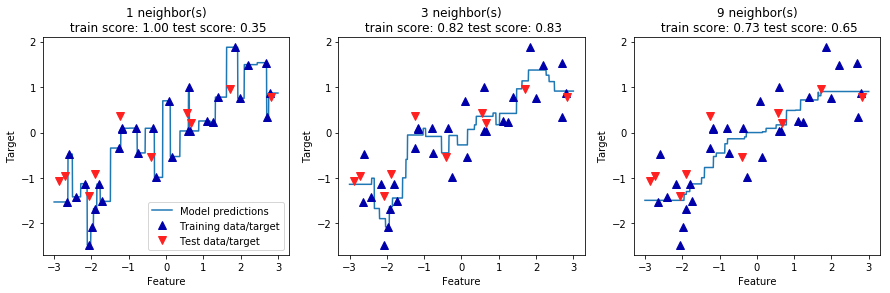

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

using only a single neighbor, each point in the training set has an obvious influence on the predictions, and the predicted values go through all of the data points. This leads to a very unsteady prediction. Considering more neighbors leads to smoother predictions, but these do not fit the training data as well. 

#### Strengths, weaknesses, and parameters
there are two important parameters to the KNeighbors classifier: the number of neighbors and how you measure distance between data points. In practice, using a small number of neighbors like three or five often works well, but you should certainly adjust this parameter.

One of the strengths of k-NN is that the model is very easy to understand, and often gives reasonable performance without a lot of adjustments. Using this algorithm is a good baseline method to try before considering more advanced techniques. Building the nearest neighbors model is usually very fast, but when your training set is very large  prediction can be slow. When using the k-NN algorithm, it’s important to preprocess your data. This approach often does not perform well on datasets with many features, and it does particularly badly with datasets where most features are 0 most of the time (sparse datasets).
it is not often used in practice, due to prediction being slow and its inability to handle many features.


### Linear Models
Linear models make a prediction using a linear function of the input features.

#### Linear models for regression.

y=ax+b

y - is the prediction
x - predictor
a - slope(coefficient)
b - bias(intercept)


w[0]: 0.393906  b: -0.031804


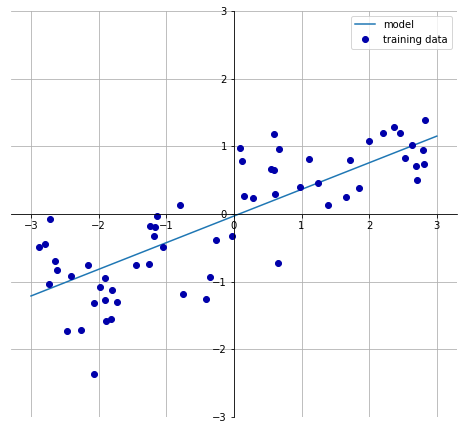

In [30]:
mglearn.plots.plot_linear_regression_wave()

Linear models for regression can be characterized as regression models for which the prediction is a line for a single feature, a plane when using two features, or a hyperplane in higher dimensions

#### Linear regression( ordinary least squares)
Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set. The mean squared error is the sum of the squared differences between the predictions and the true values. Linear regression has no parameters, 

In [31]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


An R 2 of around 0.66 is not very good, but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. For this one-dimensional dataset, there is little danger of overfitting, as the model is very simple (or restricted). However, with higher-dimensional datasets (meaning datasets with a large number of features), linear models become more powerful, and there is a higher chance of overfitting. Looking at a larger dataset.


In [33]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


This discrepancy between performance on the training set and the test set is a sign of overfitting.

#### Ridge regression
Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for ordinary least squares. In ridge regression, though, the coefficients (w) are chosen not only so that they predict well on the train‐ ing data, but also to fit an additional constraint. We also want the magnitude of coef‐ ficients to be as small as possible; in other words, all entries of w should be close to zero. Intuitively, this means each feature should have as little effect on the outcome as possible (which translates to having a small slope), while still predicting well. This constraint is an example of what is called regularization. Regularization means explic‐ itly restricting a model to avoid overfitting. Uses L2 Regularization.


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


the training set score of Ridge is lower than for LinearRegression ,while the test set score is higher. Ridge is a more restricted model, so we are less likely to overfit. A less complex model means worse performance on the training set, but better generalization . How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficients to move more toward zero, which decreases training set performance but might help generalization.

In [35]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


Decreasing alpha allows the coefficients to be less restricted. For very small values of alpha , coefficients are barely restricted at all, and we end up with a model that resembles LinearRegression.

In [36]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


We can also get a more qualitative insight into how the alpha parameter changes the model by inspecting the coef_ attribute of models with different values of alpha . A higher alpha means a more restricted model, so we expect the entries of coef_ to have smaller magnitude for a high value of alpha than for a low value of alpha.

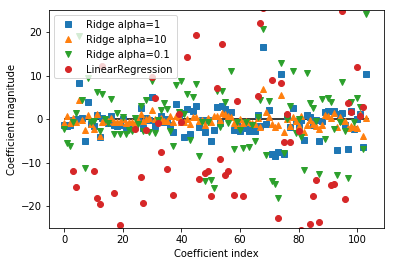

In [37]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

The y-axis shows the numeric values of the corresponding values of the coefficients. The main takeaway here is that for alpha=10 , the coefficients are mostly between around –3 and 3. The coefficients for the Ridge model with alpha=1 are somewhat larger. The dots corresponding to alpha=0.1 have larger magnitude still, and many of the dots corresponding to linear regression without any regularization 

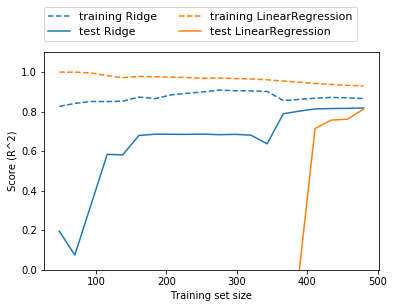

In [38]:
mglearn.plots.plot_ridge_n_samples()

the training score is higher than the test score for all dataset sizes, for both ridge and linear regression. Because ridge is regularized, the training score of ridge is lower than the training score for linear regression across the board.  the test score for ridge is better, particularly for small subsets of the data. For less than 400 data points, linear regression is not able to learn anything. As more and more data becomes available to the model, both models improve, and linear regression catches up with ridge in the end. The lesson here is that with enough train‐ ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance Another interesting aspect  is the decrease in training performance for linear regression. If more data is added, it becomes harder for a model to overfit, or memorize the data.

#### Lasso
using the lasso also restricts coefficients to be close to zero, but in a slightly different way with L1 regularization. The consequence of L1 regularization is that when using the lasso, some coefficients are exactly zero. This means some fea‐ tures are entirely ignored by the model.

In [39]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


This indicates that we are underfitting, and we find that it used only 4 of the 105 features. Similarly to Ridge , the Lasso also has a regularization parameter, alpha , that controls how strongly coefficients are pushed toward zero. The default is `alpha=1.0` . To reduce underfitting, let’s try decreasing alpha . When we
do this, we also need to increase the default setting of max_iter (the maximum number of iterations to run).

In [40]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


If we set alpha too low, however, we again remove the effect of regularization and end up overfitting, with a result similar to LinearRegression :

In [41]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0,0.5,'Coefficient magnitude')

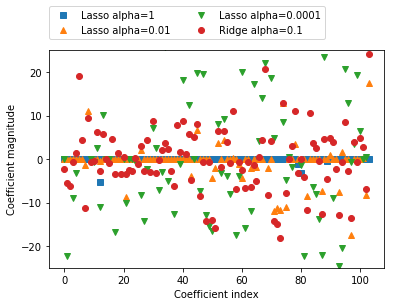

In [42]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

For alpha=1 , we not only see that most of the coefficients are zero (which we already knew), but that the remaining coefficients are also small in magnitude. Decreasing alpha to 0.01 , we obtain the solution shown as the green dots, which causes most features to be exactly zero. Using alpha=0.00001 , we get a model that is quite unregu‐ larized, with most coefficients nonzero and of large magnitude. For comparison, the best Ridge solution is shown in teal. The Ridge model with alpha=0.1 has similar predictive performance as the lasso model with alpha=0.01 , but using Ridge , all coef‐ ficients are nonzero.

#### Linear models for classification
a (binary) linear classifier is a classifier that separates two classes using a line, a plane, or a hyperplane. The two most common linear classification algorithms are logistic regression, implemented in linear_model.LogisticRegression , and linear support vector machines(linear SVMs), implemented in svm.LinearSVC. 

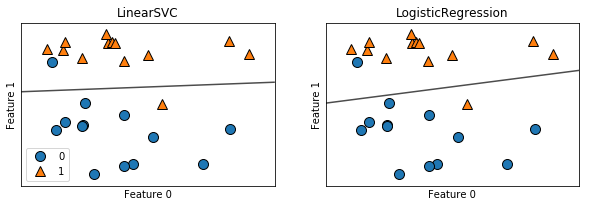

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

both models apply an L2 regularization. For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called C , and higher values of C correspond to less  egularization. In other words, when you use a high value for the parameter C , LogisticRegression and LinearSVC try to fit the training set as best as possible, while with low values of the parameter C , the models put more emphasis on finding a coefficient vector (w) that is close to zero.
There is another interesting aspect of how the parameter C acts. Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using a higher value of C stresses the importance that each individual data point be classified correctly.

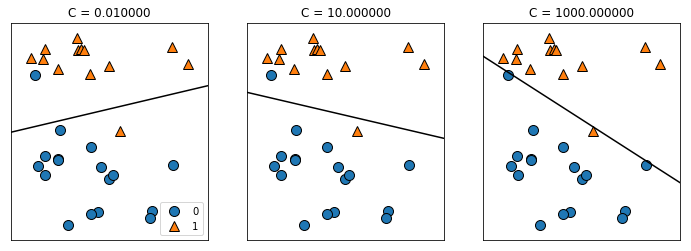

In [44]:
mglearn.plots.plot_linear_svc_regularization()

On the lefthand side, we have a very small C corresponding to a lot of regularization. Most of the points in class 0 are at the top, and most of the points in class 1 are at the bottom. The strongly regularized model chooses a relatively horizontal line, misclas‐ sifying two points. In the center plot, C is slightly higher, and the model focuses more on the two misclassified samples, tilting the decision boundary. Finally, on the righthand side, the very high value of C in the model tilts the decision boundary a lot, now correctly classifying all points in class 0. One of the points in class 1 is still misclassified, as it is not possible to correctly classify all points in this dataset using a straight line. The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.


In [45]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split( 
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


as training and test set performance are very close, it is likely that we are underfitting. Let’s try to increase C to fit a more flexible model.

In [46]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [47]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


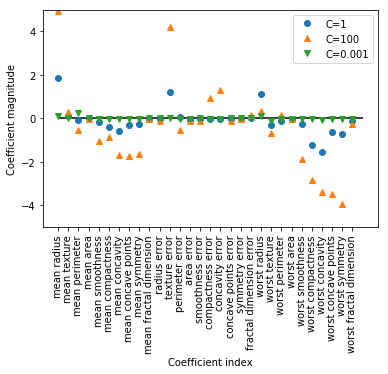

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

If we desire a more interpretable model, using L1 regularization might help, as it lim‐
its the model to using only a few features.

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


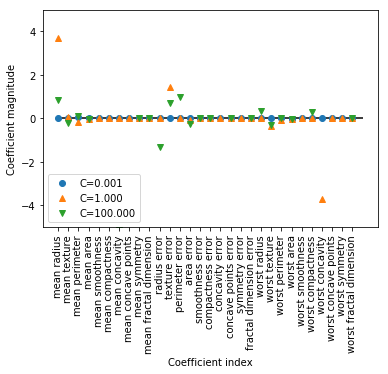

In [49]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.ylim(-5, 5)
plt.legend(loc=3)    

#### Linear models for multiclass classification
A common
technique to extend a binary classification algorithm to a multiclass classification algorithm is the one-vs.-rest approach. In the one-vs.-rest approach, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction. 

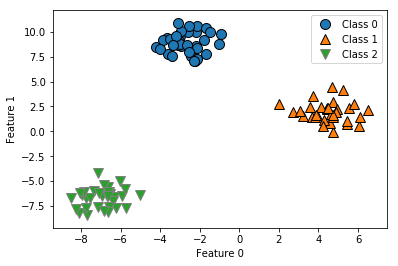

In [50]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [51]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


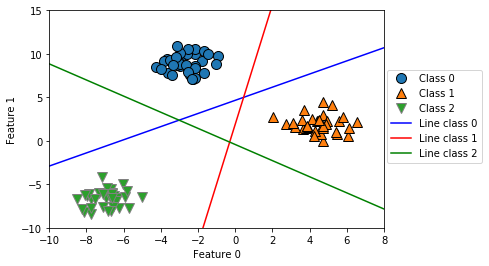

In [52]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                  linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))

the predictions for all regions of the 2D
space:

Text(0,0.5,'Feature 1')

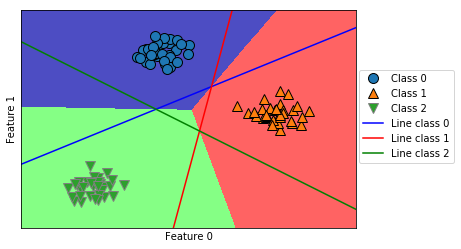

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_,
                                  linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses, and parameters
The main parameter of linear models is the regularization parameter, called alpha in the regression models and C in LinearSVC and LogisticRegression . Large values for alpha or small values for C mean simple models. In particular for the regression mod‐ els, tuning these parameters is quite important. Usually C and alpha are searched for on a logarithmic scale. The other decision you have to make is whether you want to use L1 regularization or L2 regularization. If you assume that only a few of your fea‐ tures are actually important, you should use L1. Otherwise, you should default to L2. L1 can also be useful if interpretability of the model is important. As L1 will use only a few features, it is easier to explain which features are important to the model, and what the effects of these features are.
Linear models are very fast to train, and also fast to predict. They scale to very large datasets and work well with sparse data. If your data consists of hundreds of thou‐ sands or millions of samples, you might want to investigate using the solver='sag' option in LogisticRegression and Ridge , which can be faster than the default on large datasets. Other options are the SGDClassifier class and the SGDRegressor class, which implement even more scalable versions of the linear models described here.
Another strength of linear models is that they make it relatively easy to understand how a prediction is made, using the formulas we saw earlier for regression and classi‐ fication. Unfortunately, it is often not entirely clear why coefficients are the way they are. This is particularly true if your dataset has highly correlated features; in these cases, the coefficients might be hard to interpret.
Linear models often perform well when the number of features is large compared to the number of samples. They are also often used on very large datasets, simply because it’s not feasible to train other models. However, in lower-dimensional spaces, other models might yield better generalization performance.

### Naive Bayes Classifiers

They tend to be even faster in training as compared to linear models. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like LogisticRegression and LinearSVC . hey learn parameters by looking at each feature individually and collect simple per-class statistics from each feature. There are three kinds of naive Bayes classifiers implemented in scikitlearn : GaussianNB , BernoulliNB , and MultinomialNB . GaussianNB can be applied to any continuous data, while BernoulliNB assumes binary data and MultinomialNB assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). BernoulliNB and MultinomialNB are mostly used in text data classification. The BernoulliNB classifier counts how often every feature of each class is not zero. eg

In [54]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [55]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


MultinomialNB takes into account the average value of each feature for each class, while GaussianNB stores the average value as well as the standard deviation of each feature for each class. To make a prediction, a data point is compared to the statistics for each of the classes, and the best matching class is predicted. Interestingly, for both MultinomialNB and BernoulliNB , this leads to a prediction formula that is of the same form as in the lin‐ ear models (see “Linear models for classification” on page 56). Unfortunately, coef_ for the naive Bayes models has a somewhat different meaning than in the linear mod‐ els, in that coef_ is not the same as w.

#### Strengths, weaknesses and parameters

MultinomialNB and BernoulliNB have a single parameter, alpha , which controls model complexity. The way alpha works is that the algorithm adds to the data alpha many virtual data points that have positive values for all the features. This results in a “smoothing” of the statistics. A large alpha means more smoothing, resulting in less complex models. The algorithm’s performance is relatively robust to the setting of alpha , meaning that setting alpha is not critical for good performance. However, tuning it usually improves accuracy somewhat. GaussianNB is mostly used on very high-dimensional data, while the other two var‐ iants of naive Bayes are widely used for sparse count data such as text. MultinomialNB usually performs better than BinaryNB , particularly on datasets with a relatively large number of nonzero features (i.e., large documents). The naive Bayes models share many of the strengths and weaknesses of the linear models. They are very fast to train and to predict, and the training procedure is easy to understand. The models work very well with high-dimensional sparse data and are relatively robust to the parameters. Naive Bayes models are great baseline models and are often used on very large datasets, where training even a linear model might take too long. 


### Decision Tree
they learn a hierarchy of if/else questions, leading to a decision. For example if looking for an animal one may ask various questions.

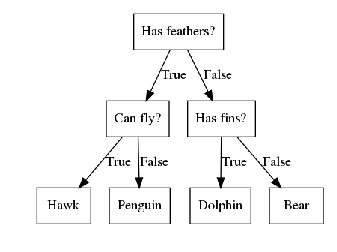

In [56]:
mglearn.plots.plot_animal_tree()

Nodes are called leafs. edges connect the answers to a question with the nexxt question that you would ask. 
Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly. the questions are refered to as _tests_ . The tests that are used on continuous data are of the form “Is feature i larger than value a?”
To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable. The top node, also called _the root_, represents the whole dataset
The split is done by testing whether a threshold is met if true it moves to one node if false moves to the other node.
This recursive process yields a binary tree of decisions, with each node containing a test.
leaf of the tree that contains data points that all share the same target value is called pure.
A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the majority target (or the single target in the case of pure leaves) in that region. The region can be found by traversing the tree from the root and going left or right, depending on whether the test is fulfilled or not.
Trees can also be used for regression.

##### Controlling complexity of decision trees.

There are two common strategies to prevent overfitting: stopping the creation of the tree early (also called pre-pruning), or building the tree but then removing or collaps‐ ing nodes that contain little information (also called post-pruning or just pruning). Possible criteria for pre-pruning include limiting the maximum depth of the tree, limiting the maximum number of leaves, or requiring a minimum number of points in a node to keep splitting it.

###### Preprunning Using Breast Cancer Dataset.


In [57]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Unpruned trees are therefore prone to overfitting and not generalizing well to new data. we can pre-prune

In [58]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


###### Analyzing decision trees

In [59]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

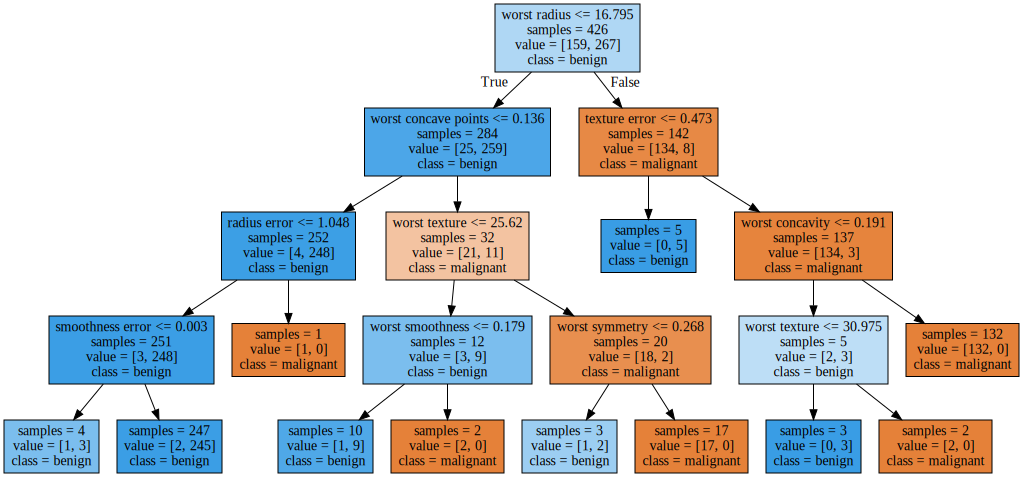

In [60]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

###### Feature importance


This rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1.

In [61]:
print(f"Feature importances:\n{tree.feature_importances_}")

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


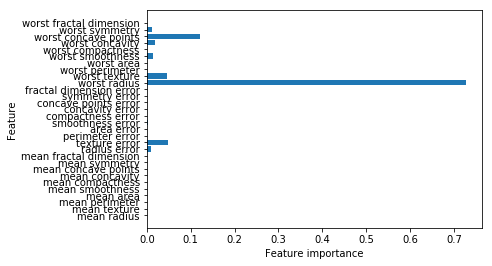

In [62]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)

feature used in the top split (“worst radius”) is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well.

Feature importances: [0. 1.]


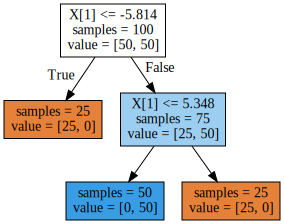

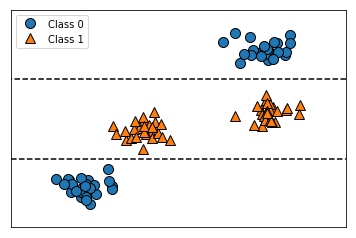

In [63]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

The usage and analysis of regression trees is very similar to that of classification trees. The DecisionTreeRegressor (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data. 

Text(0,0.5,'Price in $/Mbyte')

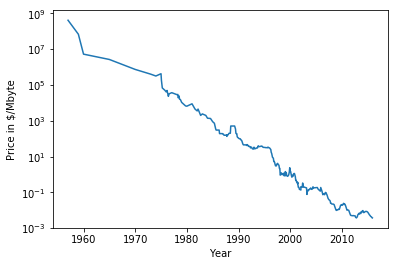

In [65]:
import pandas as pd
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [67]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)
# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

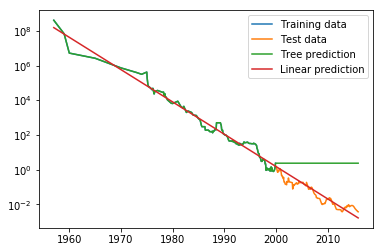

In [68]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

The linear model approximates the data with a line, as we knew it would. This line provides quite a good forecast for the test data (the years after 2000), while glossing over some of the finer variations in both the training and the test data. The tree model, on the other hand, makes perfect predictions on the training data; we did not restrict the complexity of the tree, so it learned the whole dataset by heart. However, once we leave the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate “new” responses, outside of what was seen in the training data. This shortcoming applies to all models based on trees.

#### Strengths, weaknesses, and parameters
the parameters that control model complexity in decision trees are the pre-pruning parameters that stop the building of the tree before it is fully developed. Usually, picking one of the pre-pruning strategies—setting either. max_depth , max_leaf_nodes , or min_samples_leaf —is sufficient to prevent overfitting.
Decision trees have two advantages over many of the algorithms : 
the resulting model can easily be visualized and understood by nonexperts (at least for smaller trees), and the algorithms are completely invariant to scaling of the data. As each feature is processed separately, and the possible splits of the data don’t depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algorithms. In particular, decision trees work well when you have features that are on completely different scales, or a mix of binary and con‐ tinuous features. The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. Therefore, in most applications, the ensemble method.

#### Ensembles of Decision Trees
Ensembles are methods that combine multiple machine learning models to create more powerful models. there are two ensemble models that have proven to be effective on a wide range of datasets for classification and regression, both of which use decision trees as their building blocks: random forests and gradient boos‐ ted decision trees. 

### Random Forest

A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data. If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees, can be shown using rigorous mathematics. 
To implement this strategy, we need to build many decision trees. Each tree should do an acceptable job of predicting the target, and should also be different from the other trees. Random forests get their name from injecting randomness into the tree build‐ ing to ensure each tree is different. There are two ways in which the trees in a random forest are randomized: by selecting the data points used to build a tree and by select‐ ing the features in each split test.


#### Building random forests.
To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier ).These trees will be built completely independently from each other, and the algorithm will make differ‐ ent random choices for each tree to make sure the trees are distinct. To build a tree, we first take what is called a bootstrap sample of our data. That is, from our n_samples data points, we repeatedly draw an example randomly with replacement (meaning the same sample can be picked multiple times), n_samples times. This will create a data‐ set that is as big as the original dataset, but some data points will be missing from it .
Next, a decision tree is built based on this newly created dataset. However, the algo‐ rithm we described for the decision tree is slightly modified. Instead of looking for the best test for each node, in each node the algorithm randomly selects a subset of the features, and it looks for the best possible test involving one of these features. The number of features that are selected is controlled by the max_features parameter. This selection of a subset of features is repeated separately in each node, so that each node in a tree can make a decision using a different subset of the features. The bootstrap sampling leads to each decision tree in the random forest being built on a slightly different dataset. Because of the selection of features in each node, each split in each tree operates on a different subset of features. Together, these two mech‐ anisms ensure that all the trees in the random forest are different. A critical parameter in this process is max_features . If we set max_features to n_fea tures , that means that each split can look at all features in the dataset, and no ran‐ domness will be injected in the feature selection (the randomness due to the bootstrapping remains, though). If we set max_features to 1 , that means that the splits have no choice at all on which feature to test, and can only search over different thresholds for the feature that was selected randomly. Therefore, a high max_fea tures means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well. 
To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final prediction. For classification, a “soft voting” strategy is used. This means each algo‐ rithm makes a “soft” prediction, providing a probability for each possible output label. The probabilities  redicted by all the trees are averaged, and the class with the highest probability is predicted. 

#### Analyzing random forests


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

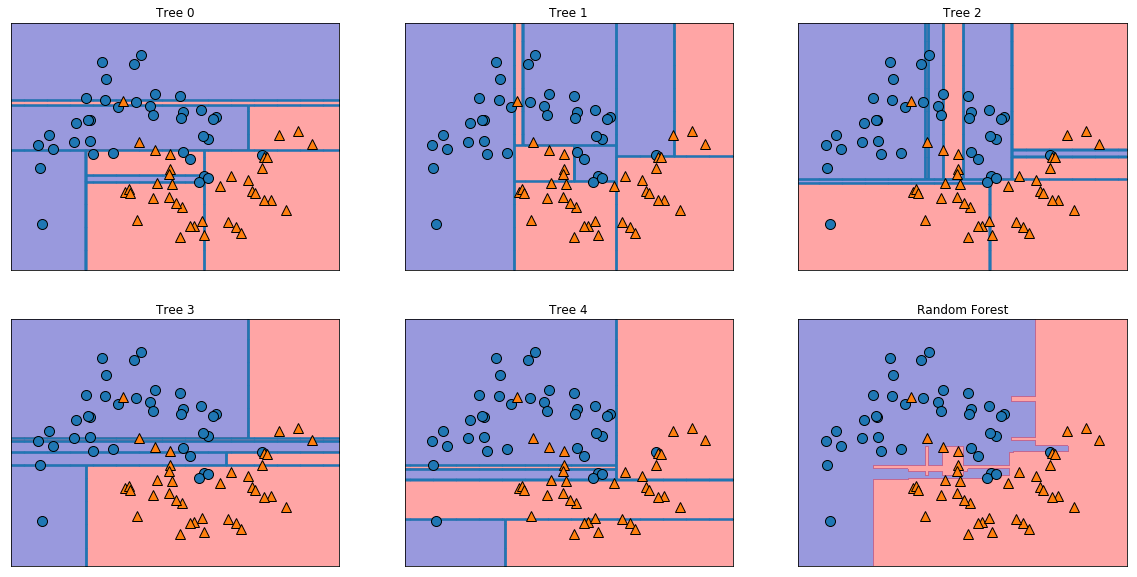

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], 
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

ecision boundaries learned by the five trees are quite dif‐ ferent. Each of them makes some mistakes, as some of the training points that are plotted here were not actually included in the training sets of the trees, due to the bootstrap sampling. The random forest overfits less than any of the trees individually, and provides a much more intuitive decision boundary. In any real application, we would use many more trees

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


The random forest gives us an accuracy of 97%, better than the linear models or a single decision tree, without tuning any parameters. We could adjust the max_fea tures setting, or apply pre-pruning as we did for the single decision tree. However, often the default parameters of the random forest already work quite well. Similarly to the decision tree, the random forest provides feature importances, which are computed by aggregating the feature importances over the trees in the forest. Typ‐ ically, the feature importances provided by the random forest are more reliable than the ones provided by a single tree.

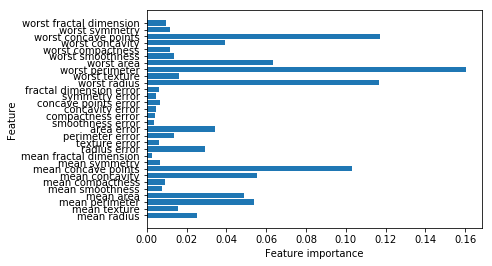

In [72]:
plot_feature_importances_cancer(forest)

#### Strengths, weaknesses, and parameters.
often work well without heavy tuning of the parameters, and don’t
require scaling of the data.
Essentially, random forests share all of the benefits of decision trees, while making up
for some of their deficiencies. One reason to still use decision trees is if you need a
compact representation of the decision-making process. It is basically impossible to
interpret tens or hundreds of trees in detail, and trees in random forests tend to be
deeper than decision trees (because of the use of feature subsets). Therefore, if you
need to summarize the prediction making in a visual way to nonexperts, a single
decision tree might be a better choice. While building random forests on large data‐
sets might be somewhat time consuming, it can be parallelized across multiple CPU
cores within a computer easily. If you are using a multi-core processor (as nearly all
modern computers do), you can use the n_jobs parameter to adjust the number of
cores to use. Using more CPU cores will result in linear speed-ups (using two cores,
the training of the random forest will be twice as fast), but specifying n_jobs larger
than the number of cores will not help. You can set n_jobs=-1 to use all the cores in
your computer.
You should keep in mind that random forests, by their nature, are random, and set‐
ting different random states (or not setting the random_state at all) can drastically
change the model that is built. The more trees there are in the forest, the more robust
it will be against the choice of random state. If you want to have reproducible results,
it is important to fix the random_state .
Random forests don’t tend to perform well on very high dimensional, sparse data,
such as text data. For this kind of data, linear models might be more appropriate.
Random forests usually work well even on very large datasets, and training can easily
be parallelized over many CPU cores within a powerful computer. However, random
forests require more memory and are slower to train and to predict than linear mod‐
els. If time and memory are important in an application, it might make sense to use a
linear model instead.
The important parameters to adjust are n_estimators , max_features , and possibly
pre-pruning options like max_depth . For n_estimators , larger is always better. Aver‐
aging more trees will yield a more robust ensemble by reducing overfitting. However,
there are diminishing returns, and more trees need more memory and more time to
train. A common rule of thumb is to build “as many as you have time/memory for.”
As described earlier, max_features determines how random each tree is, and a
smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use
the default values: max_features=sqrt(n_features) for classification and max_fea
tures=log2(n_features) for regression. Adding max_features or max_leaf_nodes
might sometimes improve performance. It can also drastically reduce space and time
requirements for training and prediction.

### Gradient boosted regression trees (gradient boosting machines)

gradient boosting works by building trees in a serial man‐
ner, where each tree tries to correct the mistakes of the previous one. By default, there
is no randomization in gradient boosted regression trees; instead, strong pre-pruning
is used. Gradient boosted trees often use very shallow trees, of depth one to five,
which makes the model smaller in terms of memory and makes predictions faster.
The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance. They are generally a bit more sensitive to
parameter settings than random forests, but can provide better accuracy if the param‐
eters are set correctly.
Apart from the pre-pruning and the number of trees in the ensemble, another impor‐
tant parameter of gradient boosting is the learning_rate , which controls how
strongly each tree tries to correct the mistakes of the previous trees. A higher learning
rate means each tree can make stronger corrections, allowing for more complex mod‐
els. Adding more trees to the ensemble, which can be accomplished by increasing
n_estimators , also increases the model complexity, as the model has more chances
to correct mistakes on the training set.

Example

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐
ting, we could either apply stronger pre-pruning by limiting the maximum depth or
lower the learning rate:

In [74]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [75]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


Both methods of decreasing the model complexity reduced the training set accuracy,
as expected. In this case, lowering the maximum depth of the trees provided a signifi‐
cant improvement of the model, while lowering the learning rate only increased the
generalization performance slightly.

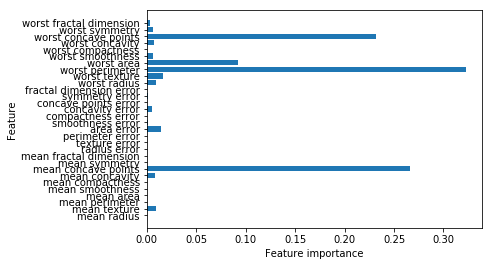

In [76]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

As both gradient boosting and random forests perform well on similar kinds of data,
a common approach is to first try random forests, which work quite robustly. If ran‐
dom forests work well but prediction time is at a premium, or it is important to
squeeze out the last percentage of accuracy from the machine learning model, mov‐
ing to gradient boosting often helps.
If you want to apply gradient boosting to a large-scale problem, it might be worth
looking into the xgboost package and its Python interface, which at the time of writ‐
ing is faster (and sometimes easier to tune) than the scikit-learn implementation of
gradient boosting on many datasets.

#### Strengths, weaknesses, and parameters.
Their main drawback
is that they require careful tuning of the parameters and may take a long time to
train. Similarly to other tree-based models, the algorithm works well without scaling
and on a mixture of binary and continuous features. As with other tree-based models,
it also often does not work well on high-dimensional sparse data.
The main parameters of gradient boosted tree models are the number of trees, n_esti
mators , and the learning_rate , which controls the degree to which each tree is
allowed to correct the mistakes of the previous trees. These two parameters are highly
interconnected, as a lower learning_rate means that more trees are needed to build
a model of similar complexity. In contrast to random forests, where a higher n_esti
mators value is always better, increasing n_estimators in gradient boosting leads to a
more complex model, which may lead to overfitting. A common practice is to fit
n_estimators depending on the time and memory budget, and then search over dif‐
ferent learning_rate s.
Another important parameter is max_depth (or alternatively max_leaf_nodes ), to
reduce the complexity of each tree. Usually max_depth is set very low for gradient
boosted models, often not deeper than five splits.


### Kernelized Support Vector Machines
Kernelized support vector machines
(often just referred to as SVMs) are an extension that allows for more complex mod‐
els that are not defined simply by hyperplanes in the input space. 

#### LInear models and nonlinear features

linear models can be quite limiting in low-dimensional
spaces, as lines and hyperplanes have limited flexibility. One way to make a linear
model more flexible is by adding more features—for example, by adding interactions
or polynomials of the input features. eg

Text(0,0.5,'Feature 1')

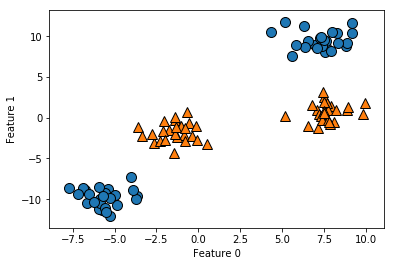

In [77]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset

Text(0,0.5,'Feature 1')

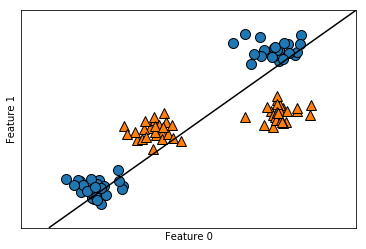

In [78]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2 , the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point, (feature0, feature1) , we now represent it as a three-
dimensional point, (feature0, feature1, feature1 ** 2) .

Text(0.5,0,'feature1 ** 2')

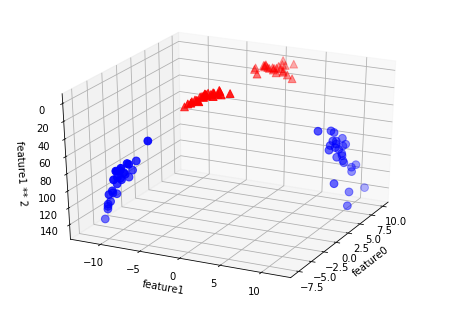

In [79]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions.

Text(0.5,0,'feature0 ** 2')

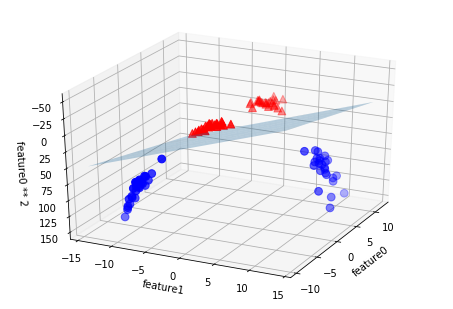

In [80]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

As a function of the original features, the linear SVM model is not actually linear any‐
more.

Text(0,0.5,'Feature 1')

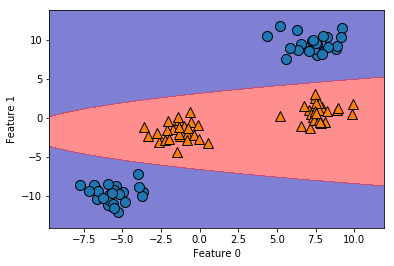

In [81]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The kernel trick
adding nonlinear features to the representation of our data can
make linear models much more powerful. However, often we don’t know which fea‐
tures to add, and adding many features (like all possible interactions in a 100-
dimensional feature space) might make computation very expensive.
The kernel trick allows us to learn a classifier in a higher-dimensional
space without actually computing the new, possibly very large representation.
and it works by directly computing the distance (more pre‐
cisely, the scalar products) of the data points for the expanded feature representation,
without ever actually computing the expansion.
There are two ways to map your data into a higher-dimensional space that are com‐
monly used with support vector machines: the polynomial kernel, which computes all
possible polynomials up to a certain degree of the original features (like feature1 **
2 * feature2 ** 5 ); and the radial basis function (RBF) kernel, also known as the
Gaussian kernel.

#### Understanding svms

During training, the SVM learns how important each of the training data points is to
represent the decision boundary between the two classes. Typically only a subset of
the training points matter for defining the decision boundary: the ones that lie on the
border between the classes. These are called support vectors and give the support vec‐
tor machine its name.
To make a prediction for a new point, the distance to each of the support vectors is
measured. A classification decision is made based on the distances to the support vec‐
tor, and the importance of the support vectors that was learned during training

Text(0,0.5,'Feature 1')

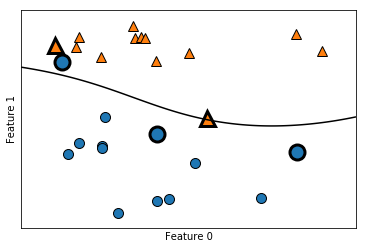

In [82]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In this case, the SVM yields a very smooth and nonlinear (not a straight line) bound‐
ary. We adjusted two parameters here: the C parameter and the gamma parameter.

#### Tuning SVM parameters 
The gamma parameter is the one shown in the formula given in the previous section,
which controls the width of the Gaussian kernel. It determines the scale of what it
means for points to be close together. The C parameter is a regularization parameter,
similar to that used in the linear models. It limits the importance of each point (or
more precisely, their dual_coef_ ).


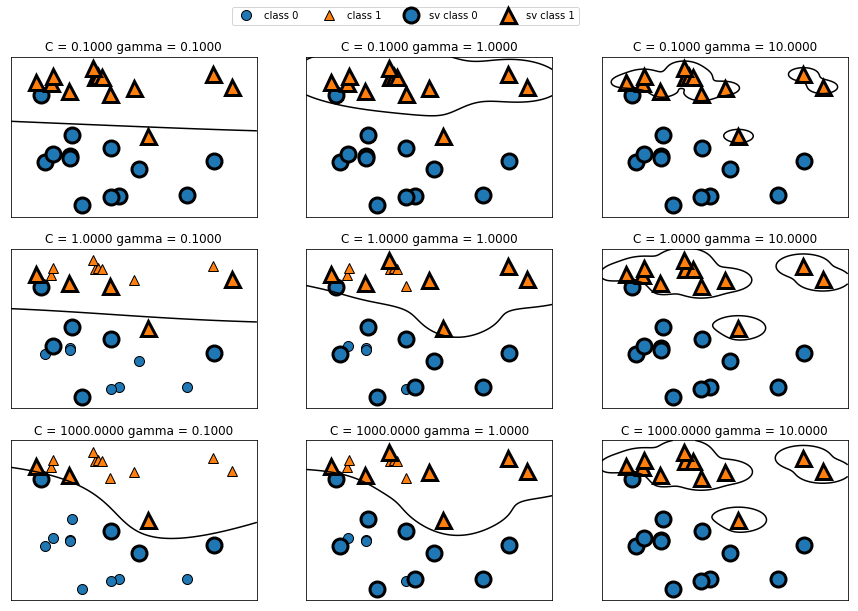

In [83]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], 
                  ncol=4, loc=(.9, 1.2))

Going from left to right, we increase the value of the parameter gamma from 0.1 to 10 .
A small gamma means a large radius for the Gaussian kernel, which means that many
points are considered close by. This is reflected in very smooth decision boundaries
on the left, and boundaries that focus more on single points further to the right. A
low value of gamma means that the decision boundary will vary slowly, which yields a
model of low complexity, while a high value of gamma yields a more complex model.
Going from top to bottom, we increase the C parameter from 0.1 to 1000 . As with the
linear models, a small C means a very restricted model, where each data point can
only have very limited influence. You can see that at the top left the decision bound‐
ary looks nearly linear, with the misclassified points barely having any influence on
the line. Increasing C , as shown on the bottom right, allows these points to have a
stronger influence on the model and makes the decision boundary bend to correctly
classify them.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.63


The model overfits quite substantially, with a perfect score on the training set and
only 63% accuracy on the test set. While SVMs often perform quite well, they are
very sensitive to the settings of the parameters and to the scaling of the data. In par‐
ticular, they require all the features to vary on a similar scale.

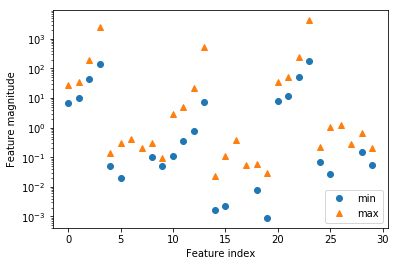

In [85]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")

#### Preprocessing data for SVMs
One way to resolve this problem is by rescaling each feature so that they are all
approximately on the same scale. A common rescaling method for kernel SVMs is to
scale the data such that all features are between 0 and 1.

In [86]:
# compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)
# subtract the min, and divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Maximum for each feature
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [87]:
X_test_scaled = (X_test - min_on_training) / range_on_training

In [88]:
svc = SVC()
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.948
Accuracy on test set: 0.951


Scaling the data made a huge difference! Now we are actually in an underfitting
regime, where training and test set performance are quite similar but less close to
100% accuracy. From here, we can try increasing either C or gamma to fit a more com‐
plex model.

In [89]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.972


#### Strengths, weaknesses, and parameters
Kernelized support vector machines are powerful models and perform well on a vari‐
ety of datasets. SVMs allow for complex decision boundaries, even if the data has only
a few features. They work well on low-dimensional and high-dimensional data (i.e.,
few and many features), but don’t scale very well with the number of samples. Run‐
ning an SVM on data with up to 10,000 samples might work well, but working with
datasets of size 100,000 or more can become challenging in terms of runtime and
memory usage.
Another downside of SVMs is that they require careful preprocessing of the data and
tuning of the parameters. This is why, these days, most people instead use tree-based
models such as random forests or gradient boosting (which require little or no pre‐
processing) in many applications. Furthermore, SVM models are hard to inspect; it
can be difficult to understand why a particular prediction was made, and it might be
tricky to explain the model to a nonexpert.
Still, it might be worth trying SVMs, particularly if all of your features represent
measurements in similar units (e.g., all are pixel intensities) and they are on similar
scales.
The important parameters in kernel SVMs are the regularization parameter C , the
choice of the kernel, and the kernel-specific parameters. Although we primarily
focused on the RBF kernel, other choices are available in scikit-learn . The RBF
kernel has only one parameter, gamma , which is the inverse of the width of the Gaus‐
sian kernel. gamma and C both control the complexity of the model, with large values
in either resulting in a more complex model. Therefore, good settings for the two
parameters are usually strongly correlated, and C and gamma should be adjusted
together.

### Neural Networks (Deep Learning)